# COVID-19 in India

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
#read data 

covid1 = pd.read_csv("/Users/aishwarya/Documents/Work/Projects/COVID19_India_analysis/data/covid_19_india.csv")

In [3]:
covid1.shape

(18110, 9)

In [4]:
covid1.head()

Sno        Date     Time State/UnionTerritory  ConfirmedIndianNational  \
0    1  30/01/2020  6:00 PM               Kerala                      1.0   
1    2  31/01/2020  6:00 PM               Kerala                      1.0   
2    3  01/02/2020  6:00 PM               Kerala                      2.0   
3    4  02/02/2020  6:00 PM               Kerala                      3.0   
4    5  03/02/2020  6:00 PM               Kerala                      3.0   

   ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                       0.0      0       0          1  
1                       0.0      0       0          1  
2                       0.0      0       0          2  
3                       0.0      0       0          3  
4                       0.0      0       0          3

In [5]:
covid1.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [6]:
covid1.isnull().sum()

Sno                             0
Date                            0
Time                            0
State/UnionTerritory            0
ConfirmedIndianNational     17664
ConfirmedForeignNational    17664
Cured                           0
Deaths                          0
Confirmed                       0
dtype: int64

In [7]:
covid1.dtypes

Sno                           int64
Date                         object
Time                         object
State/UnionTerritory         object
ConfirmedIndianNational     float64
ConfirmedForeignNational    float64
Cured                         int64
Deaths                        int64
Confirmed                     int64
dtype: object

In [8]:
covid1 = covid1.drop(['ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
covid1.shape

(18110, 7)

In [9]:
covid1.head()

Sno        Date     Time State/UnionTerritory  Cured  Deaths  Confirmed
0    1  30/01/2020  6:00 PM               Kerala      0       0          1
1    2  31/01/2020  6:00 PM               Kerala      0       0          1
2    3  01/02/2020  6:00 PM               Kerala      0       0          2
3    4  02/02/2020  6:00 PM               Kerala      0       0          3
4    5  03/02/2020  6:00 PM               Kerala      0       0          3

In [11]:
covid1["Date"]=pd.to_datetime(covid1['Date'], dayfirst=True)
covid1.head()

Sno       Date     Time State/UnionTerritory  Cured  Deaths  Confirmed
0    1 2020-01-30  6:00 PM               Kerala      0       0          1
1    2 2020-01-31  6:00 PM               Kerala      0       0          1
2    3 2020-02-01  6:00 PM               Kerala      0       0          2
3    4 2020-02-02  6:00 PM               Kerala      0       0          3
4    5 2020-02-03  6:00 PM               Kerala      0       0          3

In [12]:
covid1.dtypes

Sno                              int64
Date                    datetime64[ns]
Time                            object
State/UnionTerritory            object
Cured                            int64
Deaths                           int64
Confirmed                        int64
dtype: object

In [13]:
covid1["month"] = covid1["Date"].dt.month

In [14]:
covid1["year"] = covid1["Date"].dt.year

In [15]:
covid1.head()

Sno       Date     Time State/UnionTerritory  Cured  Deaths  Confirmed  \
0    1 2020-01-30  6:00 PM               Kerala      0       0          1   
1    2 2020-01-31  6:00 PM               Kerala      0       0          1   
2    3 2020-02-01  6:00 PM               Kerala      0       0          2   
3    4 2020-02-02  6:00 PM               Kerala      0       0          3   
4    5 2020-02-03  6:00 PM               Kerala      0       0          3   

   month  year  
0      1  2020  
1      1  2020  
2      2  2020  
3      2  2020  
4      2  2020

In [16]:
### Subsetting Karnataka

In [17]:
covid_kar = covid1[covid1['State/UnionTerritory']== "Karnataka"]

In [18]:
covid_kar1 = covid_kar.copy() 

In [19]:
covid_kar1['Cured_Daily'] = covid_kar1['Cured'].diff().fillna(covid_kar1['Cured'])
covid_kar1['Deaths_Daily'] = covid_kar1['Deaths'].diff().fillna(covid_kar1['Deaths'])
covid_kar1['Confirmed_Daily'] = covid_kar1['Confirmed'].diff().fillna(covid_kar1['Confirmed'])

In [20]:
covid_kar1['yr_mth'] = covid_kar1['year'].map(str)+ "_" + covid_kar1['month'].map(str)
covid_kar1.head()

Sno       Date     Time State/UnionTerritory  Cured  Deaths  Confirmed  \
74    75 2020-03-09  6:00 PM            Karnataka      0       0          1   
89    90 2020-03-10  6:00 PM            Karnataka      0       0          4   
108  109 2020-03-11  6:00 PM            Karnataka      0       0          4   
119  120 2020-03-12  6:00 PM            Karnataka      0       0          4   
132  133 2020-03-13  6:00 PM            Karnataka      0       1          6   

     month  year  Cured_Daily  Deaths_Daily  Confirmed_Daily  yr_mth  
74       3  2020          0.0           0.0              1.0  2020_3  
89       3  2020          0.0           0.0              3.0  2020_3  
108      3  2020          0.0           0.0              0.0  2020_3  
119      3  2020          0.0           0.0              0.0  2020_3  
132      3  2020          0.0           1.0              2.0  2020_3

In [21]:
covid_kar1.head()

Sno       Date     Time State/UnionTerritory  Cured  Deaths  Confirmed  \
74    75 2020-03-09  6:00 PM            Karnataka      0       0          1   
89    90 2020-03-10  6:00 PM            Karnataka      0       0          4   
108  109 2020-03-11  6:00 PM            Karnataka      0       0          4   
119  120 2020-03-12  6:00 PM            Karnataka      0       0          4   
132  133 2020-03-13  6:00 PM            Karnataka      0       1          6   

     month  year  Cured_Daily  Deaths_Daily  Confirmed_Daily  yr_mth  
74       3  2020          0.0           0.0              1.0  2020_3  
89       3  2020          0.0           0.0              3.0  2020_3  
108      3  2020          0.0           0.0              0.0  2020_3  
119      3  2020          0.0           0.0              0.0  2020_3  
132      3  2020          0.0           1.0              2.0  2020_3

In [22]:
covid_kar1_gp = covid_kar1.groupby("yr_mth",  as_index=False).sum()
covid_kar1_gp.head(2)

yr_mth     Sno     Cured  Deaths  Confirmed  month   year  Cured_Daily  \
0  2020_10  228842  19151225  315539   22638497    310  62620     273362.0   
1  2020_11  253485  24477198  345085   25740356    330  60600      97872.0   

   Deaths_Daily  Confirmed_Daily  
0        2363.0         227487.0  
1         625.0          63501.0

In [23]:
covid_kar1_gp= covid_kar1_gp.drop(["Sno", "Cured", "Deaths", "Confirmed", "month","year"], axis=1)

In [24]:
covid_kar1_gp.head(3)

yr_mth  Cured_Daily  Deaths_Daily  Confirmed_Daily
0  2020_10     273362.0        2363.0         227487.0
1  2020_11      97872.0         625.0          63501.0
2  2020_12      47222.0         316.0          34645.0

In [25]:
covid_kar1_gp.to_csv("covid_kar1_gp.csv")

### Let's see the trend  in Karnataka

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import matplotlib

#### Positive cases, Cured cases and Deaths - Karnataka - Monthwise

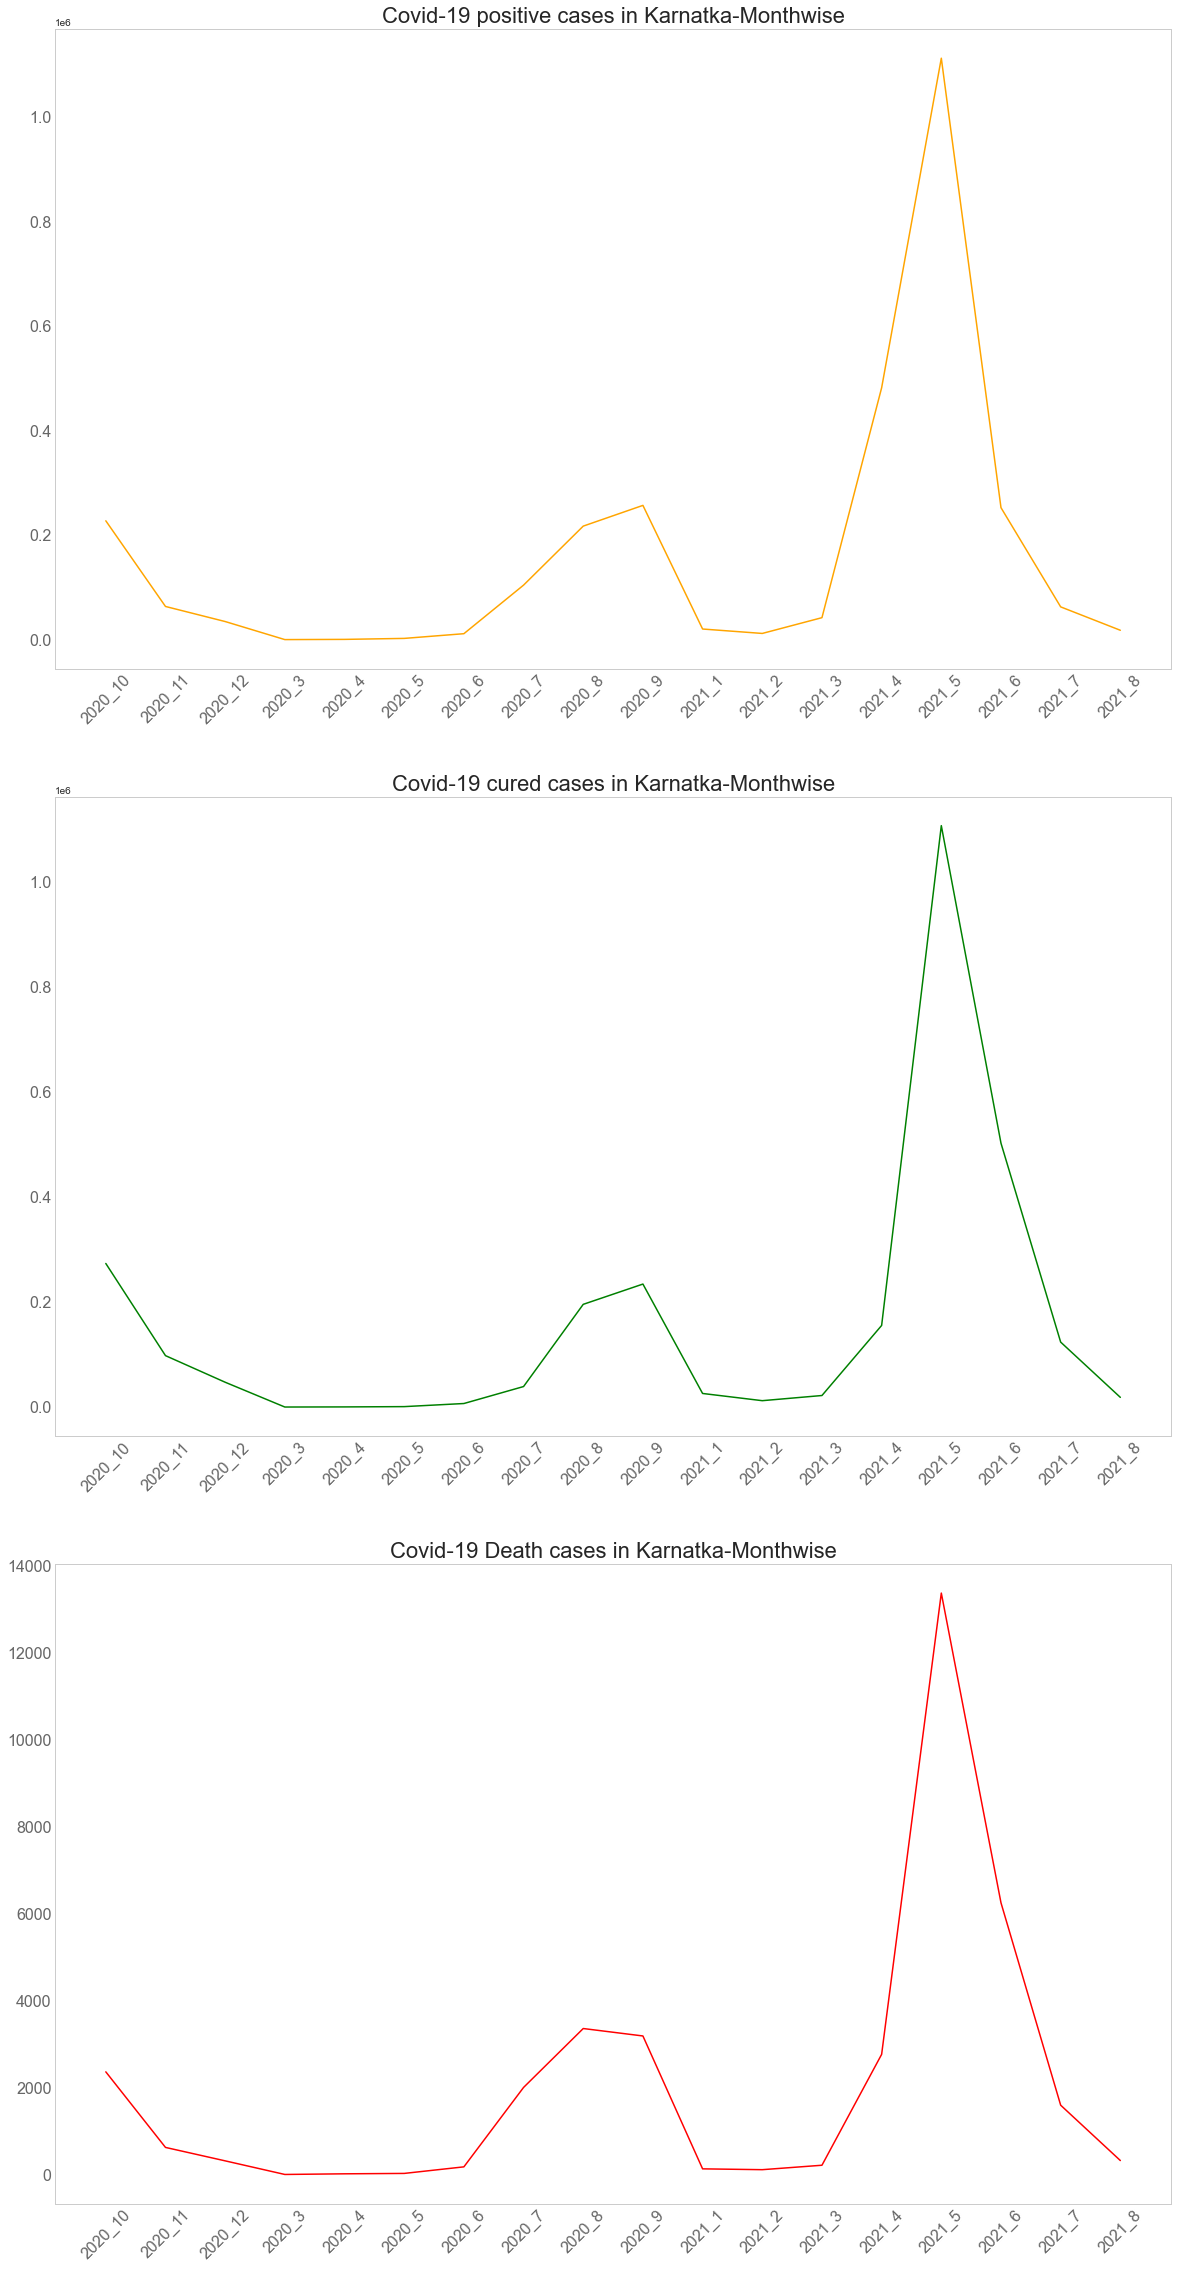

In [27]:
fig = plt.figure(figsize=(20,40))
ax = plt.axes()

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   

x = covid_kar1_gp["yr_mth"]
y = covid_kar1_gp["Confirmed_Daily"]
plt.subplot(311)
plt.plot(x, y,color='orange')
#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 positive cases in Karnatka-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)




x = covid_kar1_gp["yr_mth"]
y1 = covid_kar1_gp["Cured_Daily"]
plt.subplot(312)
plt.plot(x, y1,color='green')
#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 cured cases in Karnatka-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)


x = covid_kar1_gp["yr_mth"]
y2 = covid_kar1_gp["Deaths_Daily"]
plt.subplot(313)
plt.plot(x, y2,color='red')
#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 Death cases in Karnatka-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)


plt.show() 

#### All trends in Karnataka - Monthwise 

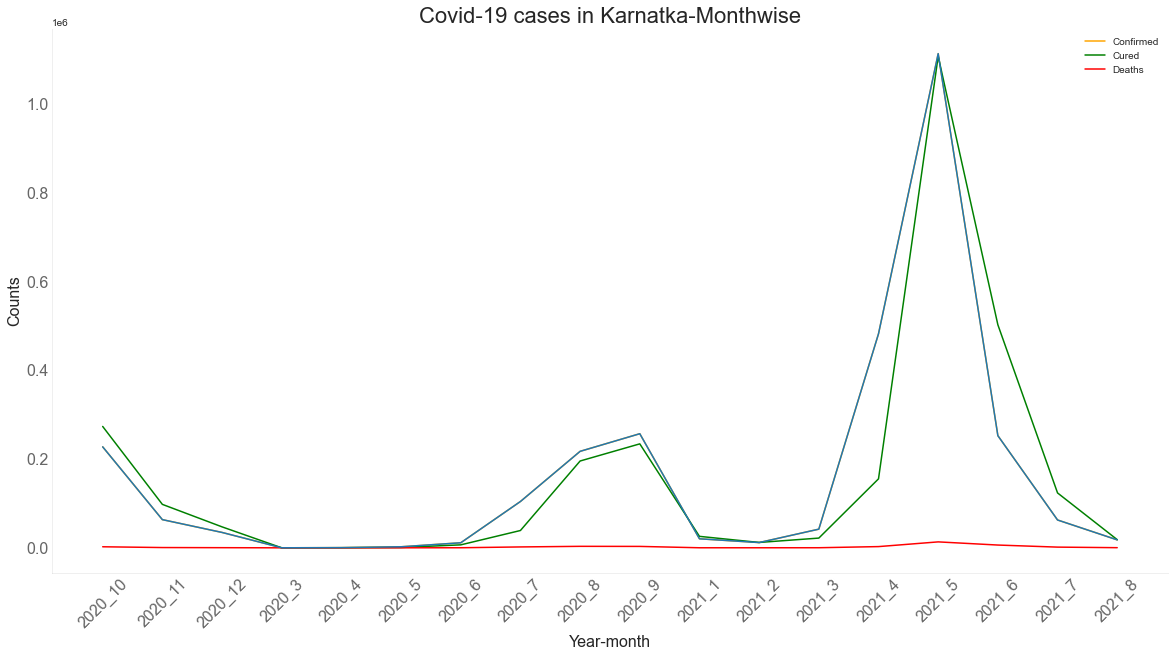

In [28]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 


x = covid_kar1_gp["yr_mth"]
y = covid_kar1_gp["Confirmed_Daily"]
y1 = covid_kar1_gp["Cured_Daily"]
y2 = covid_kar1_gp["Deaths_Daily"]

plt.plot(x, y,color='orange')
plt.plot(x, y1,color='green')
plt.plot(x, y2,color='red')
plt.gca().legend(('Confirmed','Cured', 'Deaths'))  

#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 cases in Karnatka-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)

plt.plot(x, y)
plt.xlabel("Year-month", fontsize= "16")
plt.ylabel("Counts",  fontsize= "16")
plt.show() 

In [29]:
confiremed_2021_5= int(covid_kar1_gp["Confirmed_Daily"][covid_kar1_gp["yr_mth"]== '2021_5'])
confiremed_2021_3= int(covid_kar1_gp["Confirmed_Daily"][covid_kar1_gp["yr_mth"]== '2021_3'])

In [30]:
confiremed_2021_5

1112981

In [31]:
(confiremed_2021_5 - confiremed_2021_3)/confiremed_2021_3 *100

2546.866750695617

Karnataka saw the highest peak in cases of all time in May 2021, during the second wave.
A total of 6,44,864 positive cases were reported in May 2021. 

There is a 500% rise in cases within 2 months from March to May in 2021 - Second wave

### Getting daily cases for all states 

In [32]:
covid1.head()

Sno       Date     Time State/UnionTerritory  Cured  Deaths  Confirmed  \
0    1 2020-01-30  6:00 PM               Kerala      0       0          1   
1    2 2020-01-31  6:00 PM               Kerala      0       0          1   
2    3 2020-02-01  6:00 PM               Kerala      0       0          2   
3    4 2020-02-02  6:00 PM               Kerala      0       0          3   
4    5 2020-02-03  6:00 PM               Kerala      0       0          3   

   month  year  
0      1  2020  
1      1  2020  
2      2  2020  
3      2  2020  
4      2  2020

In [33]:
covid2= covid1.drop(["Sno", "Time"], axis=1)
covid2.head()

Date State/UnionTerritory  Cured  Deaths  Confirmed  month  year
0 2020-01-30               Kerala      0       0          1      1  2020
1 2020-01-31               Kerala      0       0          1      1  2020
2 2020-02-01               Kerala      0       0          2      2  2020
3 2020-02-02               Kerala      0       0          3      2  2020
4 2020-02-03               Kerala      0       0          3      2  2020

In [34]:
covid2['yr_mth'] = covid2['year'].map(str)+ "_" + covid2['month'].map(str)
covid2.head()

Date State/UnionTerritory  Cured  Deaths  Confirmed  month  year  \
0 2020-01-30               Kerala      0       0          1      1  2020   
1 2020-01-31               Kerala      0       0          1      1  2020   
2 2020-02-01               Kerala      0       0          2      2  2020   
3 2020-02-02               Kerala      0       0          3      2  2020   
4 2020-02-03               Kerala      0       0          3      2  2020   

   yr_mth  
0  2020_1  
1  2020_1  
2  2020_2  
3  2020_2  
4  2020_2

In [35]:
states = covid2["State/UnionTerritory"].unique()
states

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [36]:
covid_all_st_daily = pd.DataFrame()

for state in states:
    covid_st = covid2[covid2['State/UnionTerritory']== state]
    
    covid_st['Cured_Daily'] = covid_st['Cured'].diff().fillna(covid_st['Cured'])
    covid_st['Deaths_Daily'] = covid_st['Deaths'].diff().fillna(covid_st['Deaths'])
    covid_st['Confirmed_Daily'] = covid_st['Confirmed'].diff().fillna(covid_st['Confirmed'])
    
    covid_all_st_daily= covid_all_st_daily.append(covid_st)
   

<ipython-input-36-0185757b8b05>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_st['Cured_Daily'] = covid_st['Cured'].diff().fillna(covid_st['Cured'])
<ipython-input-36-0185757b8b05>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_st['Deaths_Daily'] = covid_st['Deaths'].diff().fillna(covid_st['Deaths'])
<ipython-input-36-0185757b8b05>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [37]:
covid_all_st_daily[covid_all_st_daily['State/UnionTerritory']== "Himachal Pradesh"]

Date State/UnionTerritory   Cured  Deaths  Confirmed  month  year  \
253   2020-03-21     Himachal Pradesh       0       0          2      3  2020   
276   2020-03-22     Himachal Pradesh       0       0          2      3  2020   
299   2020-03-23     Himachal Pradesh       0       0          2      3  2020   
322   2020-03-24     Himachal Pradesh       0       1          3      3  2020   
346   2020-03-25     Himachal Pradesh       0       1          3      3  2020   
...          ...                  ...     ...     ...        ...    ...   ...   
17942 2021-08-07     Himachal Pradesh  202084    3533     207344      8  2021   
17978 2021-08-08     Himachal Pradesh  202218    3533     207700      8  2021   
18014 2021-08-09     Himachal Pradesh  202391    3534     207887      8  2021   
18050 2021-08-10     Himachal Pradesh  202576    3535     208197      8  2021   
18086 2021-08-11     Himachal Pradesh  202761    3537     208616      8  2021   

       yr_mth  Cured_Daily  Deaths_Daily  Confirmed_Daily  
253    2020_3          0.0           0.0              2.0  
276    2020_3          0.0           0.0              0.0  
299    2020_3          0.0           0.0              0.0  
322    2020_3          0.0           1.0              1.0  
346    2020_3          0.0           0.0              0.0  
...       ...          ...           ...              ...  
17942  2021_8        137.0           2.0            256.0  
17978  2021_8        134.0           0.0            356.0  
18014  2021_8        173.0           1.0            187.0  
18050  2021_8        185.0           1.0            310.0  
18086  2021_8        185.0           2.0            419.0  

[508 rows x 11 columns]

In [38]:
covid_allst_mthwise = covid_all_st_daily.groupby("yr_mth",  as_index=False).sum()
covid_allst_mthwise.head(3)

yr_mth      Cured   Deaths  Confirmed  month     year  Cured_Daily  \
0   2020_1          0        0          2      2     4040          0.0   
1  2020_10  198824412  3457615  226770312  10850  2191700    2245004.0   
2  2020_11  246213201  3894165  264556412  11550  2121000    1414771.0   

   Deaths_Daily  Confirmed_Daily  
0           0.0              1.0  
1       24144.0        1911356.0  
2       15498.0        1294572.0

In [39]:
covid_allst_mthwise= covid_allst_mthwise.drop([ "Cured", "Deaths", "Confirmed", "month","year"], axis=1)

In [40]:
covid_allst_mthwise.head(3)

yr_mth  Cured_Daily  Deaths_Daily  Confirmed_Daily
0   2020_1          0.0           0.0              1.0
1  2020_10    2245004.0       24144.0        1911356.0
2  2020_11    1414771.0       15498.0        1294572.0

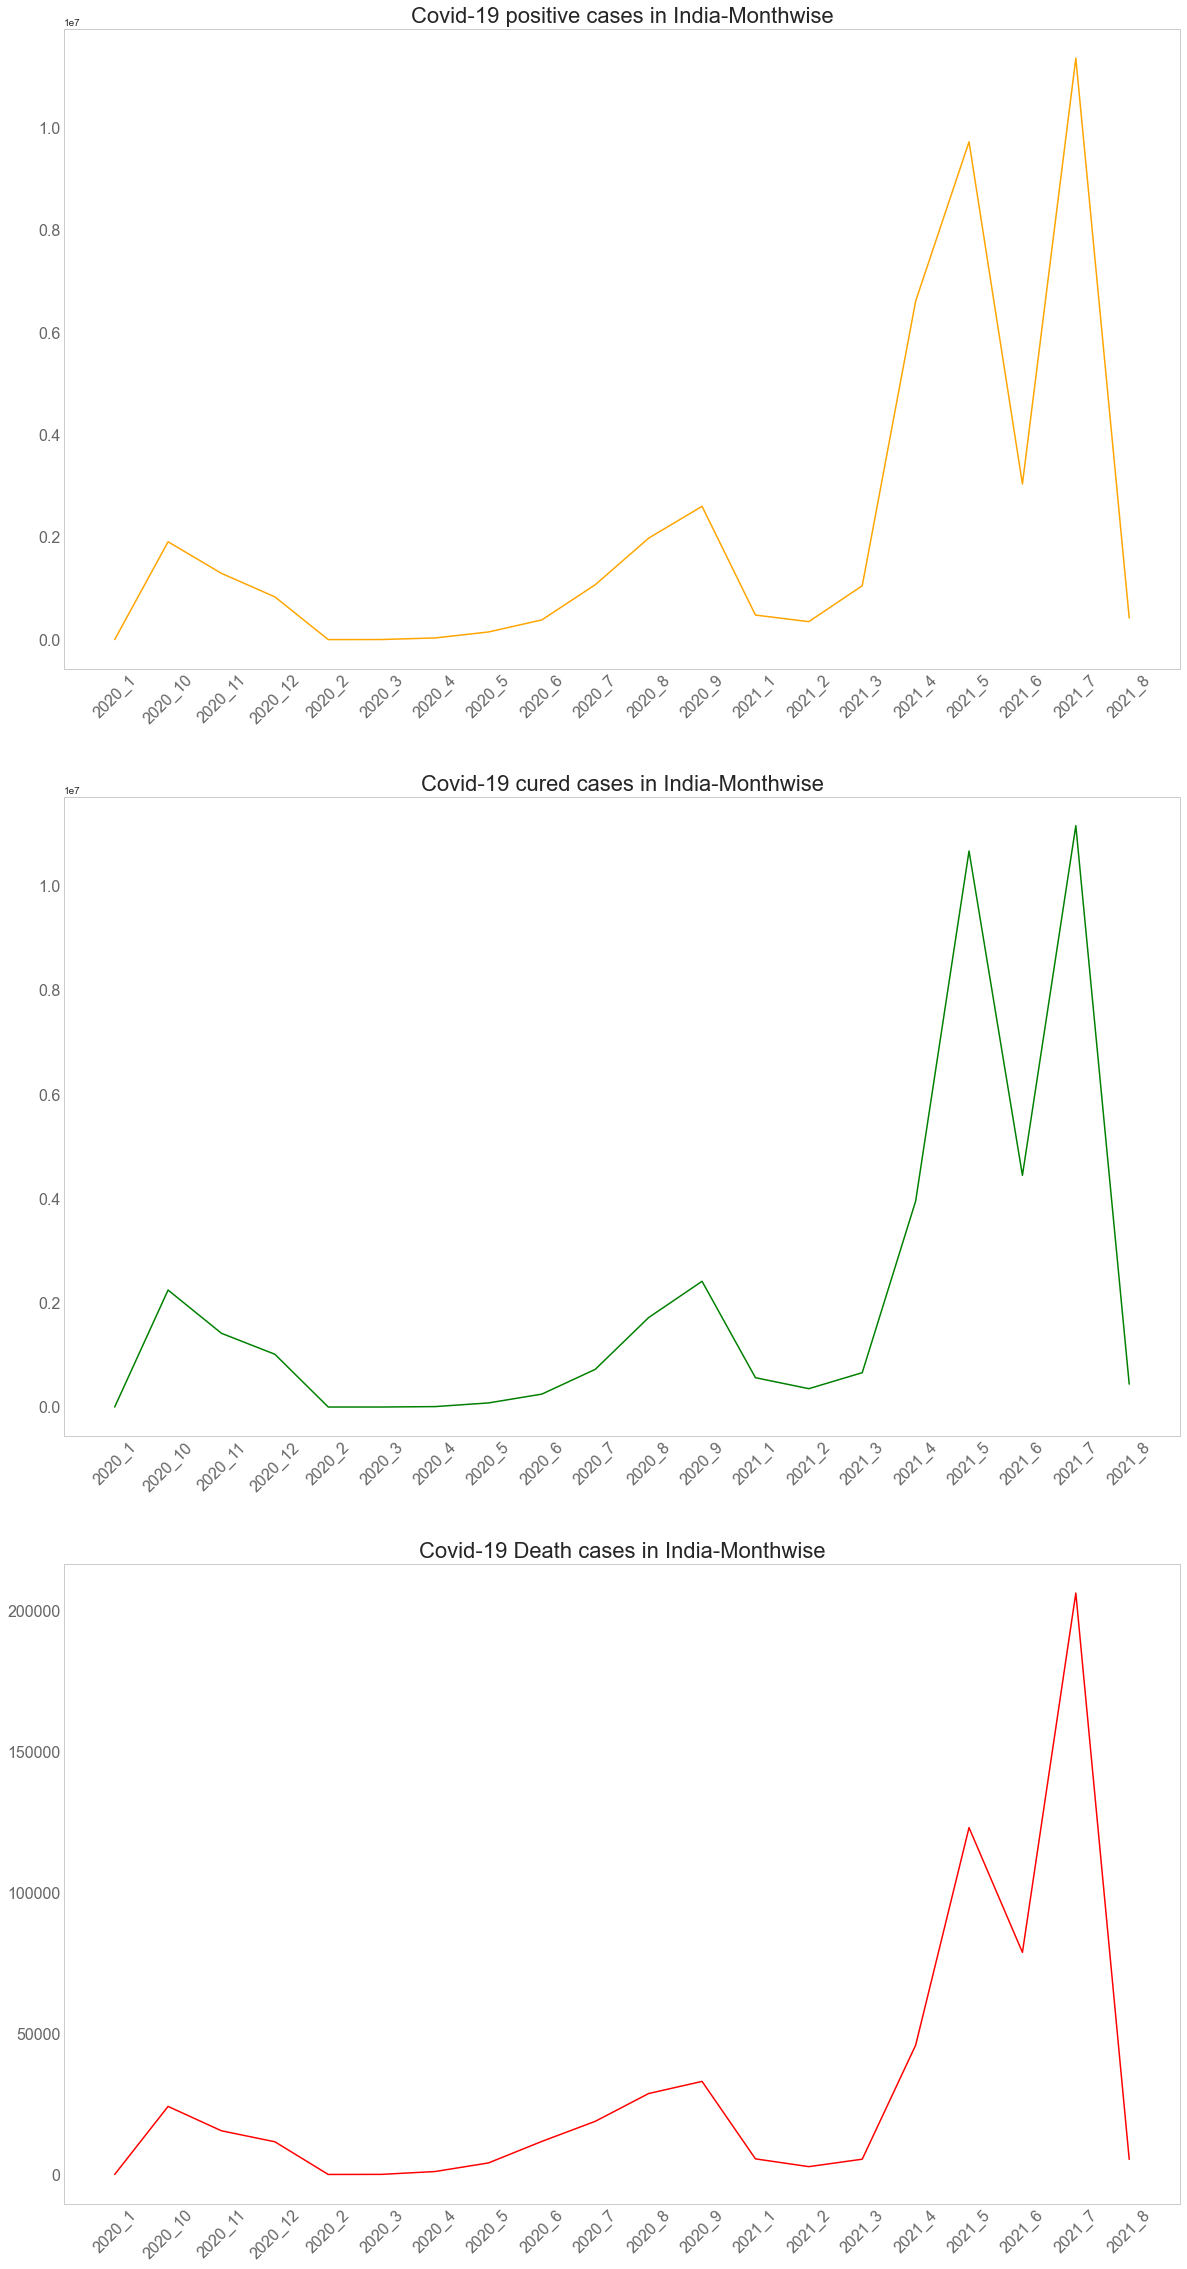

In [41]:
#Line chart 
fig = plt.figure(figsize=(20,40))
ax = plt.axes()

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   

x = covid_allst_mthwise["yr_mth"]
y = covid_allst_mthwise["Confirmed_Daily"]
plt.subplot(311)
plt.plot(x, y,color='orange')
#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 positive cases in India-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)




x = covid_allst_mthwise["yr_mth"]
y1 = covid_allst_mthwise["Cured_Daily"]
plt.subplot(312)
plt.plot(x, y1,color='green')
#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 cured cases in India-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)


x = covid_allst_mthwise["yr_mth"]
y2 = covid_allst_mthwise["Deaths_Daily"]
plt.subplot(313)
plt.plot(x, y2,color='red')
#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 Death cases in India-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)


plt.show() 

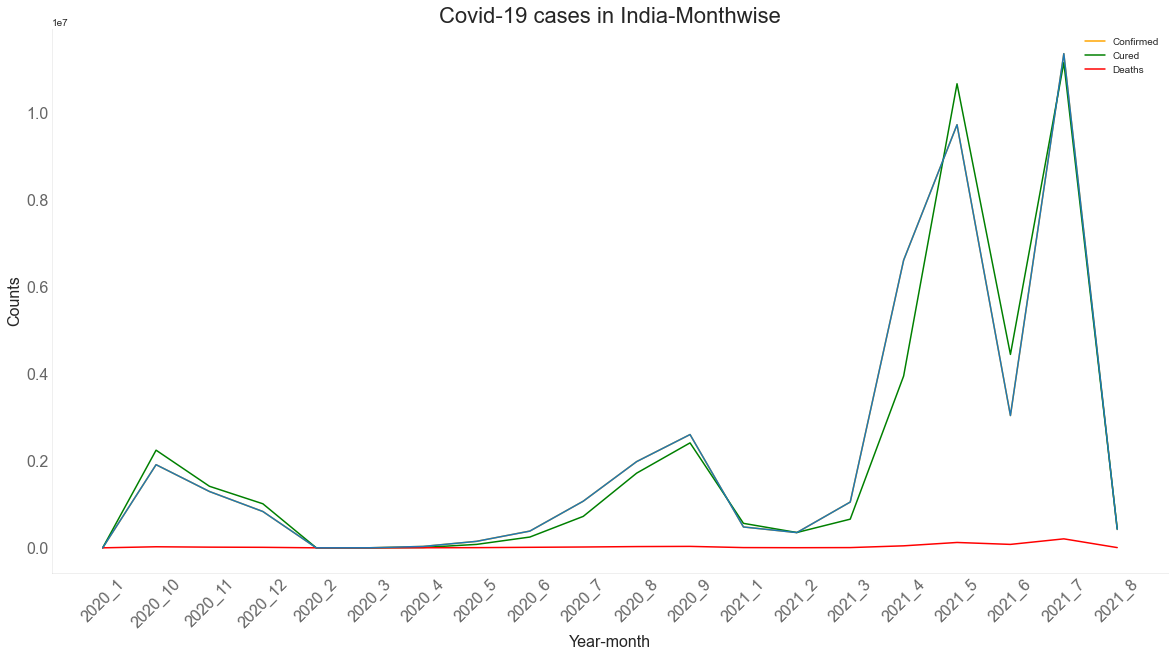

In [42]:
#Line chart 
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 


x = covid_allst_mthwise["yr_mth"]
y = covid_allst_mthwise["Confirmed_Daily"]
y1 = covid_allst_mthwise["Cured_Daily"]
y2 = covid_allst_mthwise["Deaths_Daily"]

plt.plot(x, y,color='orange')
plt.plot(x, y1,color='green')
plt.plot(x, y2,color='red')
plt.gca().legend(('Confirmed','Cured', 'Deaths'))  

#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 cases in India-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)

plt.plot(x, y)
plt.xlabel("Year-month", fontsize= "16")
plt.ylabel("Counts",  fontsize= "16")
plt.show() 

In [43]:
confiremed_2021_7= int(covid_allst_mthwise["Confirmed_Daily"][covid_allst_mthwise["yr_mth"]== '2021_7'])
confiremed_2021_5= int(covid_allst_mthwise["Confirmed_Daily"][covid_allst_mthwise["yr_mth"]== '2021_5'])
confiremed_2021_6= int(covid_allst_mthwise["Confirmed_Daily"][covid_allst_mthwise["yr_mth"]== '2021_6'])

In [44]:
(confiremed_2021_7 - confiremed_2021_6)/confiremed_2021_6 *100

273.5803428726244

In [45]:
confiremed_2021_7

11362151

In [46]:
(confiremed_2021_7 - confiremed_2021_5)/confiremed_2021_5 *100

16.79941175490994

India saw it's highest peak of cases in July 2021 - 1,16,14,660 cases 

Within June and July there is a 560% rise in positive cases. Between May and july there is a 113% rise in positive cases 



### Statewise stats

In [47]:
covid_statewise = covid_all_st_daily.groupby("State/UnionTerritory",  as_index=False).sum()
covid_statewise.head(3)

State/UnionTerritory      Cured   Deaths  Confirmed  month     year  \
0  Andaman and Nicobar Islands    1848286    27136    1938498   3160  1018303   
1               Andhra Pradesh  370426530  2939367  392432753   3202  1046583   
2            Arunachal Pradesh    6588149    26799    7176907   3134  1002143   

   Cured_Daily  Deaths_Daily  Confirmed_Daily  
0       7412.0         129.0           7548.0  
1    1952736.0       13564.0        1985182.0  
2      47821.0         248.0          50605.0

In [48]:
covid_statewise= covid_statewise.drop(["Cured", "Deaths", "Confirmed", "month","year"], axis=1)
covid_statewise.head(3)

State/UnionTerritory  Cured_Daily  Deaths_Daily  Confirmed_Daily
0  Andaman and Nicobar Islands       7412.0         129.0           7548.0
1               Andhra Pradesh    1952736.0       13564.0        1985182.0
2            Arunachal Pradesh      47821.0         248.0          50605.0

In [49]:
covid_statewise.sort_values(by='Confirmed_Daily', ascending=False)

State/UnionTerritory  Cured_Daily  Deaths_Daily  \
27                               Maharashtra    6159676.0      134201.0   
28                            Maharashtra***    6000911.0      130753.0   
22                                    Kerala    3396184.0       18004.0   
21                                 Karnataka    2861499.0       36848.0   
20                                Karanataka    2821491.0       36197.0   
38                                Tamil Nadu    2524400.0       34367.0   
1                             Andhra Pradesh    1952736.0       13564.0   
43                             Uttar Pradesh    1685492.0       22775.0   
45                               West Bengal    1506532.0       18252.0   
12                                     Delhi    1411280.0       25068.0   
8                               Chhattisgarh     988189.0       13544.0   
33                                    Odisha     972710.0        6565.0   
36                                 Rajasthan     944700.0        8954.0   
14                                   Gujarat     814802.0       10077.0   
25                            Madhya Pradesh     781330.0       10514.0   
26                         Madhya Pradesh***     780735.0       10506.0   
15                                   Haryana     759790.0        9652.0   
4                                      Bihar     715352.0        9646.0   
5                                  Bihar****     701234.0        9452.0   
39                                 Telangana     638410.0        3831.0   
35                                    Punjab     582791.0       16322.0   
3                                      Assam     559684.0        5420.0   
40                                 Telengana     362160.0        2312.0   
19                                 Jharkhand     342102.0        5130.0   
44                               Uttarakhand     334650.0        7368.0   
18                         Jammu and Kashmir     317081.0        4392.0   
16                          Himachal Pradesh     202761.0        3537.0   
17                         Himanchal Pradesh     200040.0        3507.0   
13                                       Goa     167978.0        3164.0   
34                                Puducherry     119115.0        1800.0   
29                                   Manipur      96776.0        1664.0   
41                                   Tripura      77811.0         773.0   
30                                 Meghalaya      64157.0        1185.0   
7                                 Chandigarh      61150.0         811.0   
2                          Arunachal Pradesh      47821.0         248.0   
31                                   Mizoram      33722.0         171.0   
32                                  Nagaland      26852.0         585.0   
37                                    Sikkim      25095.0         356.0   
23                                    Ladakh      20130.0         207.0   
10  Dadra and Nagar Haveli and Daman and Diu      10646.0           4.0   
9                     Dadra and Nagar Haveli      10261.0           4.0   
24                               Lakshadweep      10165.0          51.0   
0                Andaman and Nicobar Islands       7412.0         129.0   
6           Cases being reassigned to states          0.0           0.0   
42                                Unassigned          0.0           0.0   
11                               Daman & Diu          0.0           0.0   

    Confirmed_Daily  
27        6363442.0  
28        6229596.0  
22        3586693.0  
21        2921049.0  
20        2885238.0  
38        2579130.0  
1         1985182.0  
43        1708812.0  
45        1534999.0  
12        1436852.0  
8         1003356.0  
33         988997.0  
36         953851.0  
14         825085.0  
25         791980.0  
26         791656.0  
15         770114.0  
4          725279.0  
5          715730.0  
39         650353.0  
35         599573.0  
3          576

In [50]:
covid_statewise.drop(covid_statewise.loc[covid_statewise['State/UnionTerritory']=="Telengana"].index, inplace=True)
covid_statewise.drop(covid_statewise.loc[covid_statewise['State/UnionTerritory']=="Himanchal Pradesh"].index, inplace=True)
covid_statewise.drop(covid_statewise.loc[covid_statewise['State/UnionTerritory']=="Bihar****"].index, inplace=True)
covid_statewise.drop(covid_statewise.loc[covid_statewise['State/UnionTerritory']=="Madhya Pradesh***"].index, inplace=True)
covid_statewise.drop(covid_statewise.loc[covid_statewise['State/UnionTerritory']=="Karanataka"].index, inplace=True)
covid_statewise.drop(covid_statewise.loc[covid_statewise['State/UnionTerritory']=="Maharashtra***"].index, inplace=True)


In [51]:
covid_statewise= covid_statewise.sort_values(by='Confirmed_Daily', ascending=False)

### Statewise comparison of Confirmed, Cured and Death cases

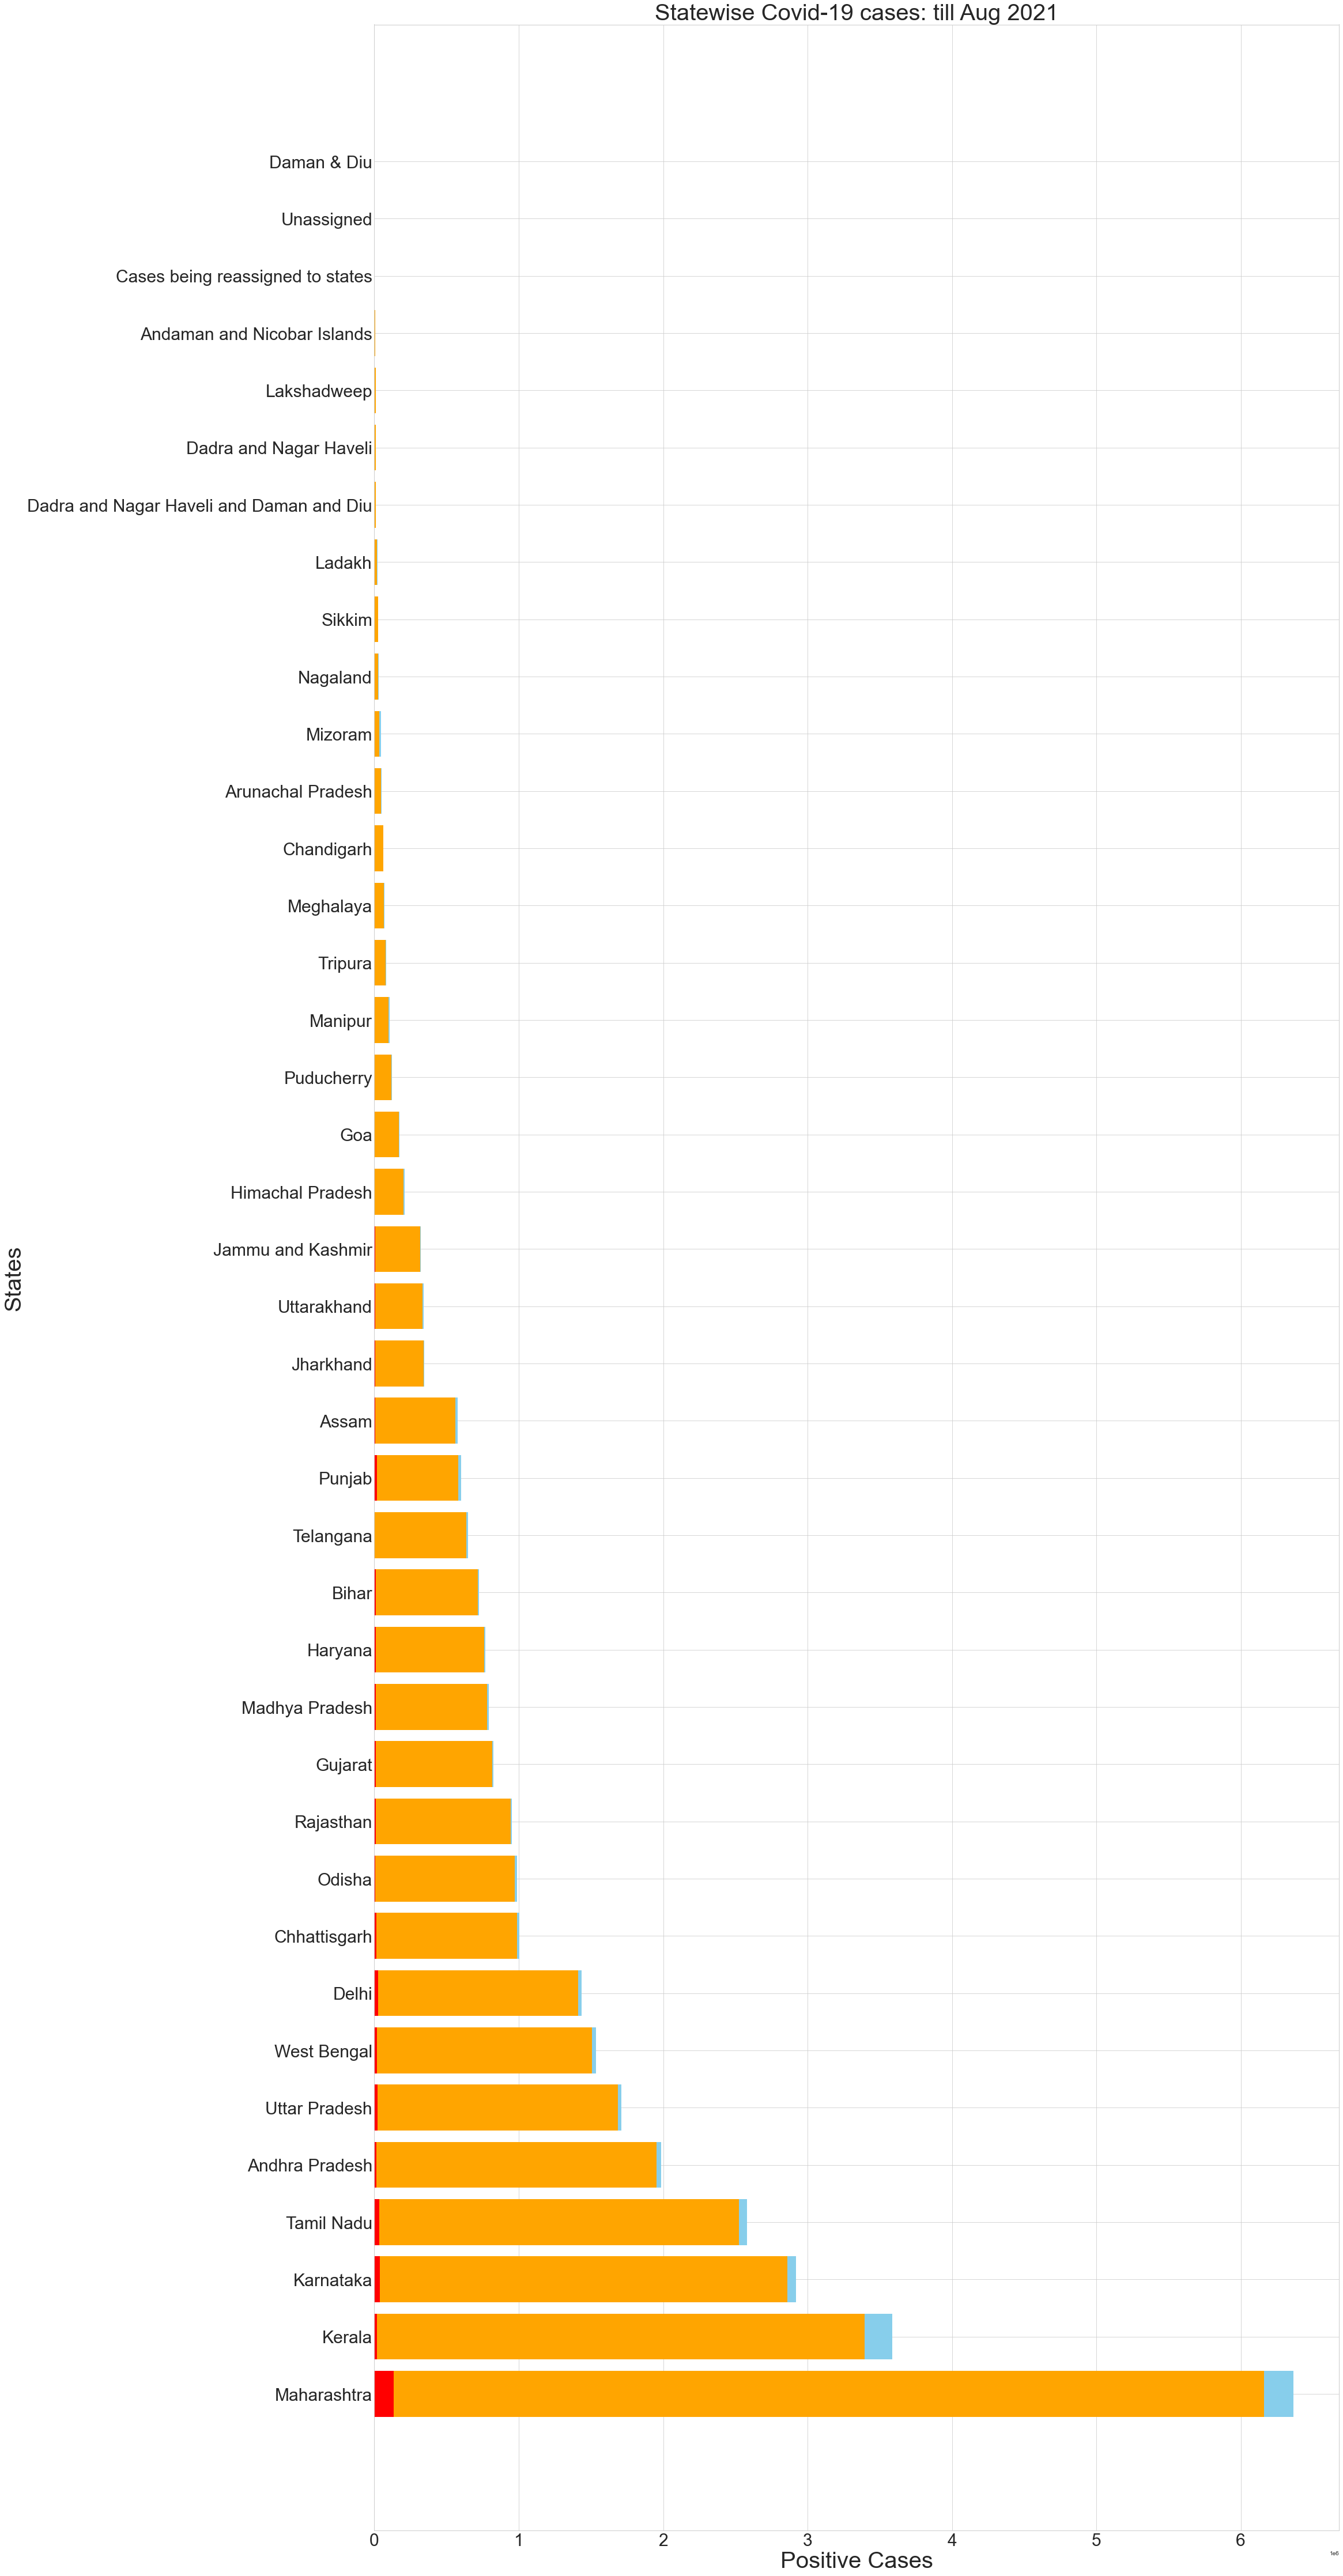

In [52]:
x1= covid_statewise["Confirmed_Daily"]
x2= covid_statewise["Cured_Daily"]
x3= covid_statewise["Deaths_Daily"]
y= covid_statewise["State/UnionTerritory"]

plt.figure(figsize=(30,80))
plt.barh(y, x1,color='skyblue')
plt.barh(y, x2,color='orange')
plt.barh(y, x3,color='red')

# Decoration
plt.ylabel("States", fontsize=40)
plt.xlabel("Positive Cases", fontsize=40)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.title("Statewise Covid-19 cases: till Aug 2021",fontsize=40)
plt.show()

### Treemap to show the statewise distribution of Positive cases

In [53]:
import plotly.express as px
fig = px.treemap(covid_statewise, path= ["State/UnionTerritory"], values = "Confirmed_Daily")
fig.update_traces(root_color="white")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()



Maharashtra, Kerala, Karnataka, TamilNadu and Andhra Pradesh have highest number of confirmed cases

### Treemap to show the statewise distribution of Cured cases

In [54]:
import plotly.express as px
fig = px.treemap(covid_statewise, path= ["State/UnionTerritory"], values = "Cured_Daily")
fig.update_traces(root_color="white")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()



Maharashtra, Kerala and Karnataka have highest number of recoveries

### Treemap to show the statewise distribution of Death cases

In [55]:
import plotly.express as px
fig = px.treemap(covid_statewise, path= ["State/UnionTerritory"], values = "Deaths_Daily")
fig.update_traces(root_color="white")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Maharashtra, Karnataka and Tamil Nadu have the highest deaths

## Active cases trend 

In [56]:
covid2["Active"] = covid2["Confirmed"]-covid2["Cured"]
covid2.head()

Date State/UnionTerritory  Cured  Deaths  Confirmed  month  year  \
0 2020-01-30               Kerala      0       0          1      1  2020   
1 2020-01-31               Kerala      0       0          1      1  2020   
2 2020-02-01               Kerala      0       0          2      2  2020   
3 2020-02-02               Kerala      0       0          3      2  2020   
4 2020-02-03               Kerala      0       0          3      2  2020   

   yr_mth  Active  
0  2020_1       1  
1  2020_1       1  
2  2020_2       2  
3  2020_2       3  
4  2020_2       3

In [57]:
covid3 = covid2.groupby("Date", as_index=False).sum("Active")
covid3.head()

Date  Cured  Deaths  Confirmed  month  year  Active
0 2020-01-30      0       0          1      1  2020       1
1 2020-01-31      0       0          1      1  2020       1
2 2020-02-01      0       0          2      2  2020       2
3 2020-02-02      0       0          3      2  2020       3
4 2020-02-03      0       0          3      2  2020       3

In [58]:
covid3=covid3.drop(["year","month"], axis=1)
covid3.head(3)

Date  Cured  Deaths  Confirmed  Active
0 2020-01-30      0       0          1       1
1 2020-01-31      0       0          1       1
2 2020-02-01      0       0          2       2

In [59]:
covid3["year"]= covid3["Date"].dt.year
covid3["month"] = covid3["Date"].dt.month
covid3["yr_mth"]= covid3['year'].map(str)+ "_" + covid3['month'].map(str)
covid3.head()

Date  Cured  Deaths  Confirmed  Active  year  month  yr_mth
0 2020-01-30      0       0          1       1  2020      1  2020_1
1 2020-01-31      0       0          1       1  2020      1  2020_1
2 2020-02-01      0       0          2       2  2020      2  2020_2
3 2020-02-02      0       0          3       3  2020      2  2020_2
4 2020-02-03      0       0          3       3  2020      2  2020_2

In [60]:
covid3.to_csv("covid_active.csv")

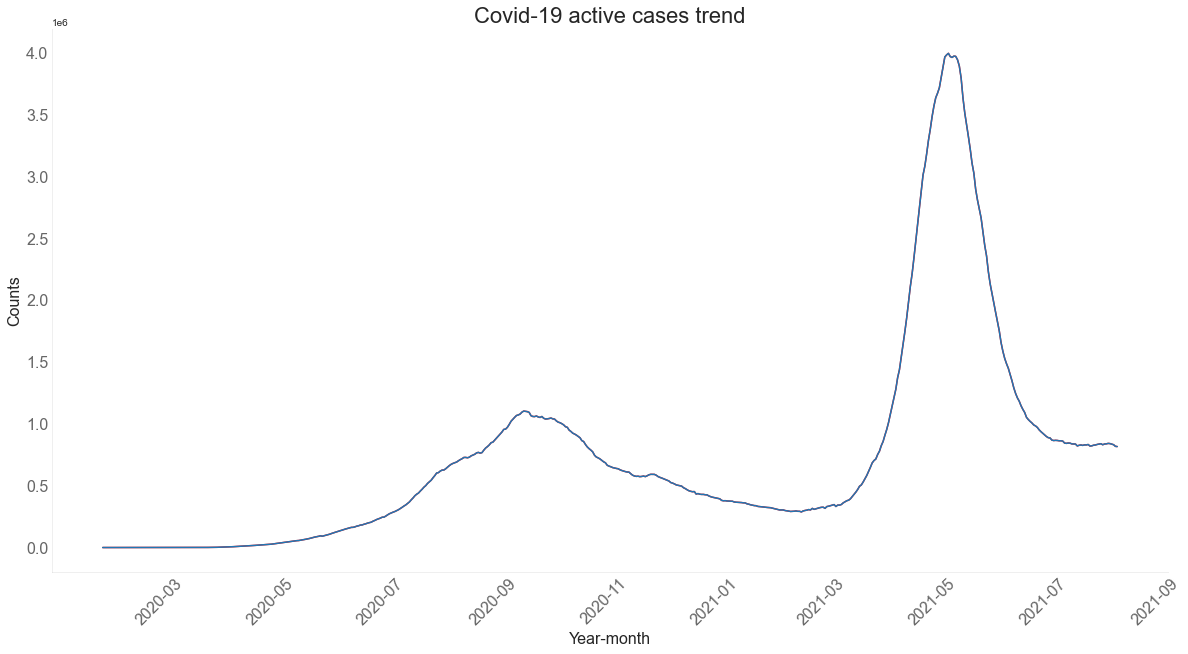

In [61]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 

x = covid3["Date"]
y = covid3["Active"]

plt.plot(x, y, color= 'red')

# plt.gca().legend(('Confirmed','Cured', 'Deaths'))  

#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 active cases trend", fontsize=22)
plt.grid(axis='both', alpha=.3)

plt.plot(x, y)
plt.xlabel("Year-month", fontsize= "16")
plt.ylabel("Counts",  fontsize= "16")
plt.show() 

In [ ]:
### Trend of recovered, confirmed and death cases over time, across states